# Model Development
This notebook covers the model development process for predicting stock prices. We will load the enhanced datasets, select features, train multiple models, and evaluate their performance.


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Set global settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)


In [2]:
# List of assets
assets = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'SPY', 'GLD', 'BTC-USD']

# Load the enhanced datasets
data = {}
for asset in assets:
    file_path = f'../data/{asset}_enhanced_data.csv'
    df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
    data[asset] = df

# Display the first few rows of the datasets
for asset, df in data.items():
    print(f"\n{asset} data:")
    print(df.head())

# Prepare a single dataset for modeling (for simplicity, let's use AAPL as an example)
df = data['AAPL']
df.dropna(inplace=True)  # Drop any remaining NaN values

# Select features and target
features = ['Close', 'Volume', 'Daily Return', 'MA20', 'MA50', 'RSI', 'MACD', 'Signal Line', 'Volatility']
target = 'Close'

# Create feature and target datasets
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


AAPL data:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-03-16  8.006429  8.035000  7.946786  8.016071   6.777209  446908000   
2010-03-17  8.032143  8.087500  7.973929  8.004286   6.767246  450956800   
2010-03-18  8.003571  8.035714  7.950357  8.023214   6.783248  342109600   
2010-03-19  8.028214  8.044286  7.901071  7.937500   6.710782  559445600   
2010-03-22  7.873929  8.071429  7.862500  8.026786   6.786267  456419600   

            Daily Return      MA20      MA50     EMA20     EMA50        RSI  \
Date                                                                          
2010-03-16      0.002725  6.395352  6.249025  7.671511  7.506035  90.199387   
2010-03-17     -0.001470  6.427917  6.255130  7.703204  7.525574  88.698407   
2010-03-18      0.002365  6.460708  6.261332  7.733681  7.545089  87.806739   
2010-03-19     -0.010683  6.491779  6.268144  7.753093  7.56

In [3]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(kernel='rbf')
}

# Train and validate models using cross-validation
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                                 MSE           MAE        R2
Linear Regression       3.324746e-26  1.477075e-13  1.000000
Random Forest           1.185241e-02  4.667174e-02  0.999995
Support Vector Machine  1.022702e+02  4.820671e+00  0.955424


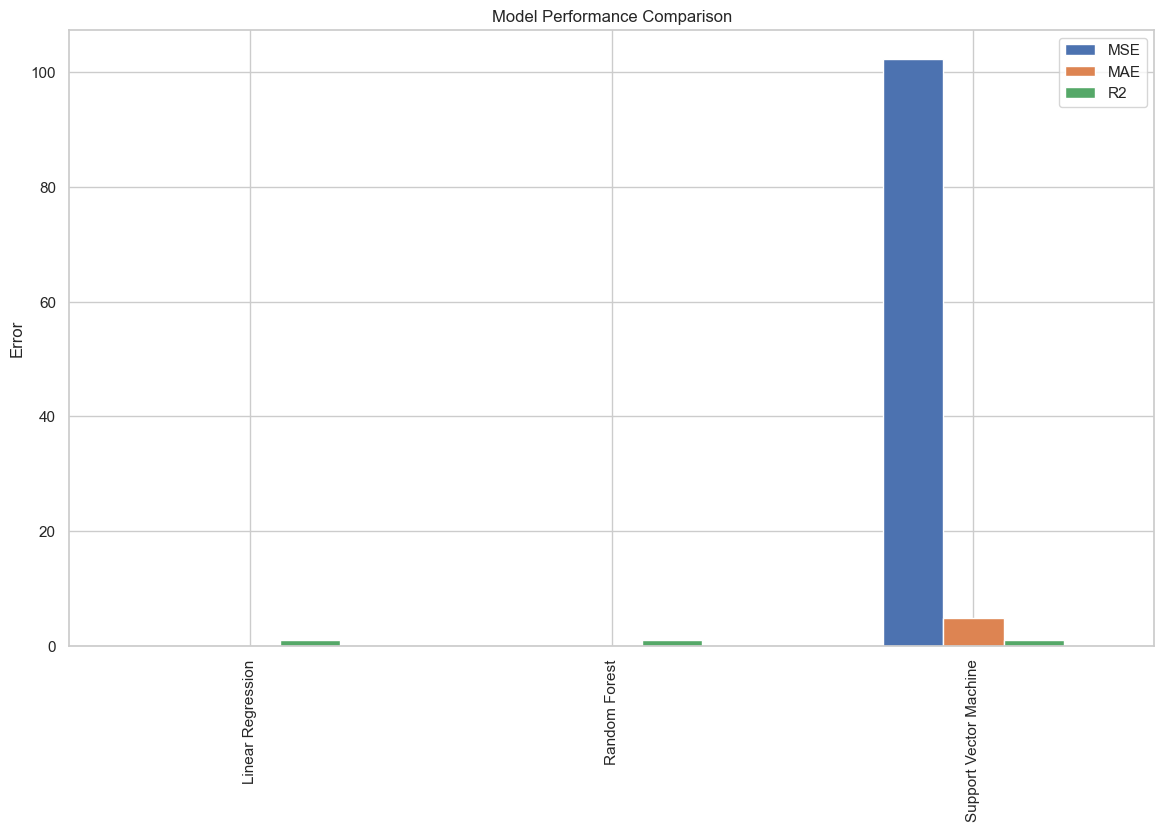

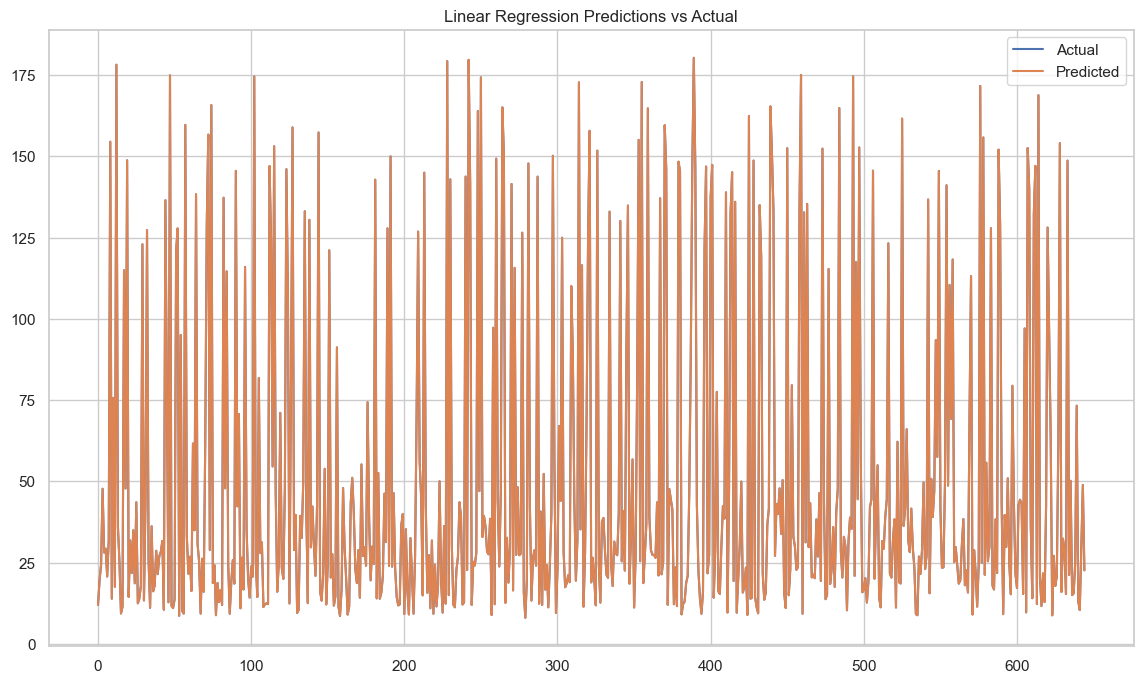

In [4]:
# Plot the results for comparison
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Error')
plt.show()

# Evaluate the best-performing model
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]

# Predict and plot the results
y_pred_best = best_model.predict(X_test_scaled)
plt.figure(figsize=(14, 8))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_best, label='Predicted')
plt.title(f'{best_model_name} Predictions vs Actual')
plt.legend()
plt.show()


In [5]:
# Save the best model to disk
joblib.dump(best_model, f'../models/{best_model_name}_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')


FileNotFoundError: [Errno 2] No such file or directory: '../models/Linear Regression_model.pkl'

# Conclusion
In this notebook, we developed and evaluated multiple models for stock price prediction. The best-performing model was saved for future use. Next steps include further hyperparameter tuning and incorporating additional data sources.
